In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#import thu vien
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model
import pickle

In [32]:
#import du lieu
pickle_in = open("gdrive/MyDrive/huymep/x_huy_age.pickle","rb")
x = pickle.load(pickle_in)

In [33]:
x.shape

(5927, 200, 200, 3)

In [34]:
#import label tuoi
pickle_in = open("gdrive/MyDrive/huymep/y_huy_age.pickle","rb")
y_age = pickle.load(pickle_in)

In [35]:
#import label gioi tinh
pickle_in = open("gdrive/MyDrive/huymep/y_huy_gender.pickle","rb")
y_gender = pickle.load(pickle_in)

In [54]:
from tensorflow import keras
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#gọi model = hàm sequential để liên kết các layer
model = Sequential()
#tao lớp 2 lop tích chập đầu tiên có shape đầu vào là (200,200,3), kernel size là 3,số output filter là 64 , padding độn 0 và ham relu
#nhằm mục đích extract feature của data và share trong số 
model.add(Conv2D(input_shape=(200,200,3),filters=64,kernel_size=(3,3),padding="same", activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3),padding='same', activation='relu'))
#thu gọn kích thước output = maxpool có pool sized =5, độ trược 2 ô pixel
model.add(MaxPooling2D(pool_size=(2, 2),strides = 3))
#tăng output filter lên 128
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
#tăng số out filter lên 256
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
#bỏ qua 1 số node = dropout
model.add(Dropout(0.25))
#làm phẳng dữ liệu = flatten
model.add(Flatten())
#tính toán output của fully connected layers thông qua hàm Dense
model.add(Dense(256, activation='relu'))
#đầuu ra là 1
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 67, 67, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 65, 65, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 30, 30, 256)      

In [57]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [58]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 64)      1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 67, 67, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 65, 65, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 30, 30, 256)      

In [59]:
hist = model.fit(x, y_age, batch_size=128, epochs=30)#, validation_split= (0.1))

Epoch 1/30
47/47 [==============================] - 27s 510ms/step - loss: 450657.6250 - mae: 122.9083
Epoch 2/30
47/47 [==============================] - 23s 481ms/step - loss: 360.4557 - mae: 14.6414
Epoch 3/30
47/47 [==============================] - 23s 487ms/step - loss: 277.3885 - mae: 12.7952
Epoch 4/30
47/47 [==============================] - 23s 483ms/step - loss: 231.3179 - mae: 11.5799
Epoch 5/30
47/47 [==============================] - 23s 481ms/step - loss: 224.2472 - mae: 11.3738
Epoch 6/30
47/47 [==============================] - 23s 483ms/step - loss: 192.8033 - mae: 10.4281
Epoch 7/30
47/47 [==============================] - 23s 483ms/step - loss: 202.6290 - mae: 10.8115
Epoch 8/30
47/47 [==============================] - 23s 483ms/step - loss: 166.4901 - mae: 9.6255
Epoch 9/30
47/47 [==============================] - 23s 483ms/step - loss: 156.3538 - mae: 9.3951
Epoch 10/30
47/47 [==============================] - 23s 484ms/step - loss: 145.7224 - mae: 9.0405
Epoch 11

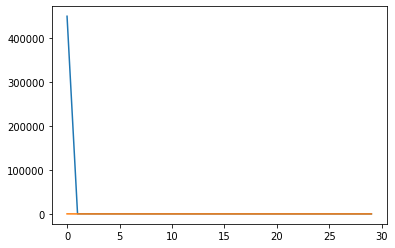

In [69]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['mae'])

In [60]:
#!mkdir -p gdrive/MyDrive/age_train/saved_model
model.save('tuoicuahuy.h5')


In [79]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))

	return img

1 tuoi


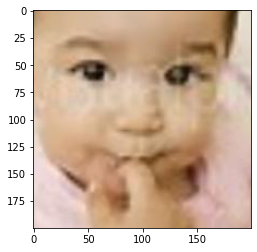

In [ ]:
img = load_image('gdrive/MyDrive/age_train/train/0/2_1_4_20161221195137728.jpg.chip.jpg')
plt.imshow(img)
img = img_to_array(img)
	# load model
model = load_model('tuoicuahuy.h5')
img = img.reshape(1, 200, 200,3)

	# predict the class
result = int(model.predict(img))

print(result, 'tuoi')

22 tuoi


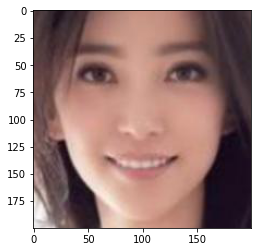

In [ ]:
img = load_image('gdrive/MyDrive/age_train/train/10/29_1_2_20170104021825031.jpg.chip.jpg')
plt.imshow(img)
img = img_to_array(img)
	# load model
model = load_model('tuoicuahuy.h5')
img = img.reshape(1, 200, 200,3)

	# predict the class
result = int(model.predict(img))

print(result, 'tuoi')

25 tuoi


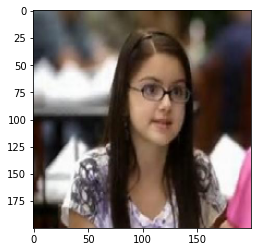

In [ ]:
img = load_image('gdrive/MyDrive/age_train/test/14_1_0_20170119150832998.jpg')
plt.imshow(img)
img = img_to_array(img)
	# load model
model = load_model('tuoicuahuy.h5')
img = img.reshape(1, 200, 200,3)

	# predict the class
result = int(model.predict(img))

print(result, 'tuoi')

7 tuoi


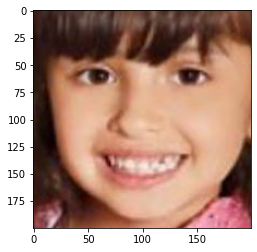

In [ ]:
img = load_image('gdrive/MyDrive/age_train/train/2/6_1_4_20170103230723185.jpg.chip.jpg')
plt.imshow(img)
img = img_to_array(img)
	# load model
model = load_model('tuoicuahuy.h5')
img = img.reshape(1, 200, 200,3)

	# predict the class
result = int(model.predict(img))

print(result, 'tuoi')

18 tuoi


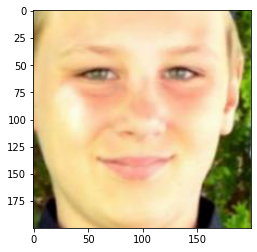

In [ ]:
img = load_image('gdrive/MyDrive/age_train/train/8/23_0_0_20170105184121759.jpg.chip.jpg')
plt.imshow(img)
img = img_to_array(img)
	# load model
model = load_model('tuoicuahuy.h5')
img = img.reshape(1, 200, 200,3)

	# predict the class
result = int(model.predict(img))

print((result), 'tuoi')

27 tuoi


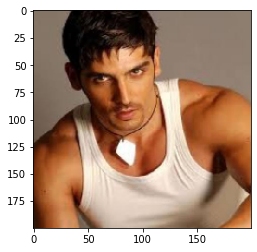

In [ ]:
img = load_image('gdrive/MyDrive/age_train/test/23_0_3_20170119164352326.jpg')
plt.imshow(img)
img = img_to_array(img)
	# load model
model = load_model('tuoicuahuy.h5')
img = img.reshape(1, 200, 200,3)

	# predict the class
result = int(model.predict(img))

print(result, 'tuoi')

42 tuoi


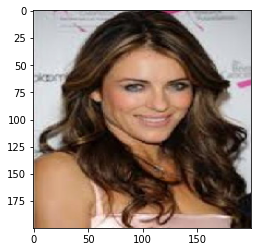

In [ ]:
img = load_image('gdrive/MyDrive/age_train/test/23_1_0_20170116221819522.jpg')
plt.imshow(img)
img = img_to_array(img)

img = img.reshape(1, 200, 200,3)

	# predict the class
result = int(model.predict(img))

print(result, 'tuoi')

44 tuoi


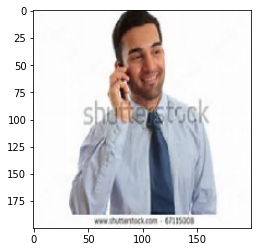

In [ ]:
img = load_image('gdrive/MyDrive/age_train/test/23_0_3_20170119163804981.jpg')
plt.imshow(img)
img = img_to_array(img)

img = img.reshape(1, 200, 200,3)

	# predict the class
result = int(model.predict(img))

print(result, 'tuoi')

23 tuoi


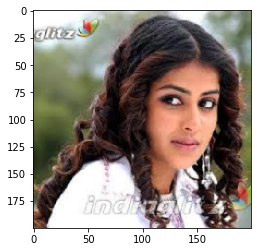

In [ ]:
img = load_image('gdrive/MyDrive/age_train/test/23_1_3_20170119164422814.jpg')
plt.imshow(img)
img = img_to_array(img)

img = img.reshape(1, 200, 200,3)

	# predict the class
result = int(model.predict(img))

print(result, 'tuoi')

20 tuoi


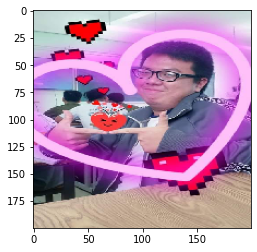

In [ ]:
img = load_image('gdrive/MyDrive/age_train/test/nghia.jpg')
plt.imshow(img)
img = img_to_array(img)

img = img.reshape(1, 200, 200,3)

	# predict the class
result = int(model.predict(img))

print(result, 'tuoi')

In [62]:
y_gender


array([49, 17, 17, ..., 28, 25, 25], dtype=uint64)

In [71]:
from tensorflow.keras.utils import to_categorical
y_gender =to_categorical(y_gender,2)

In [74]:
y_gender

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [72]:
from tensorflow import keras
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#gọi model = hàm sequential để liên kết các layer
model = Sequential()
#tao lớp 2 lop tích chập đầu tiên có shape đầu vào là (200,200,3), kernel size là 3,số output filter là 64 , padding độn 0 và ham relu
#nhằm mục đích extract feature của data và share trong số 
model.add(Conv2D(input_shape=(200,200,3),filters=64,kernel_size=(3,3),padding="same", activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3),padding='same', activation='relu'))
#thu gọn kích thước output = maxpool có pool sized =5, độ trược 2 ô pixel
model.add(MaxPooling2D(pool_size=(2, 2),strides = 3))
#tăng output filter lên 128
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
#tăng số out filter lên 256
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = 2))
#bỏ qua 1 số node = dropout
model.add(Dropout(0.25))
#làm phẳng dữ liệu = flatten
model.add(Flatten())
#tính toán output của fully connected layers thông qua hàm Dense
model.add(Dense(256, activation='relu'))
#đầuu ra là 2
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 200, 200, 64)      1792      
                                                                 
 conv2d_21 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 67, 67, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 65, 65, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 30, 30, 256)      

In [73]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
hist = model.fit(x, y_gender, batch_size=128, epochs=30)#, validation_split= (0.1))

Epoch 1/30
47/47 [==============================] - 23s 470ms/step - loss: 29.1145 - accuracy: 0.6179
Epoch 2/30
47/47 [==============================] - 22s 478ms/step - loss: 0.4933 - accuracy: 0.7587
Epoch 3/30
47/47 [==============================] - 23s 483ms/step - loss: 0.4285 - accuracy: 0.8016
Epoch 4/30
47/47 [==============================] - 22s 477ms/step - loss: 0.3903 - accuracy: 0.8301
Epoch 5/30
47/47 [==============================] - 22s 476ms/step - loss: 0.3584 - accuracy: 0.8416
Epoch 6/30
47/47 [==============================] - 23s 479ms/step - loss: 0.3479 - accuracy: 0.8503
Epoch 7/30
47/47 [==============================] - 23s 480ms/step - loss: 0.3177 - accuracy: 0.8596
Epoch 8/30
47/47 [==============================] - 22s 478ms/step - loss: 0.2814 - accuracy: 0.8785
Epoch 9/30
47/47 [==============================] - 23s 479ms/step - loss: 0.2653 - accuracy: 0.8865
Epoch 10/30
47/47 [==============================] - 23s 479ms/step - loss: 0.2550 - accur

In [76]:
model.save('gioitinhcuahuy.h5')

In [86]:
y_gender = np.argmax(y_gender,axis = 1)


In [77]:
sex = ['nam','nu']


nu


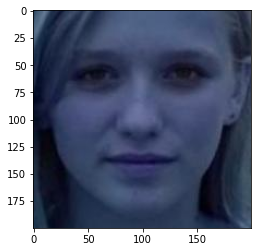

In [97]:
model = load_model('gioitinhcuahuy.h5')
	# predict the class
result=model.predict(x[1].reshape(-1,200,200,3))
print(sex[int(np.argmax(result))])
plt.imshow(x[1])

nam


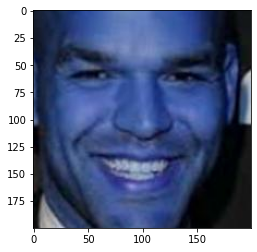

In [96]:

model = load_model('gioitinhcuahuy.h5')
	# predict the class
result=model.predict(x[3].reshape(-1,200,200,3))
print(sex[int(np.argmax(result))])
plt.imshow(x[3])

